<a href="https://colab.research.google.com/github/nakshith21/Lok-sabha-election/blob/main/LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/lok sabha/LS_2.0_(2).csv')

In [4]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [5]:
df = df.rename(columns={"CRIMINAL\nCASES": "Criminal", "GENERAL\nVOTES": "Genral_votes","POSTAL\nVOTES":"Postal_votes","TOTAL\nVOTES":"Total_votes"})
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,Criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,Genral_votes,Postal_votes,Total_votes,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [6]:
round(df.isnull().sum()/len(df.index),2)
df = df.dropna() ## deleting all the NaN values for Analysis purposes

In [7]:
Num_cons = df.groupby('STATE')['CONSTITUENCY'].nunique().sort_values(ascending = False).reset_index()

ax = px.bar(Num_cons,y='CONSTITUENCY',x='STATE',color = 'CONSTITUENCY', title='The Number of Constituencies from each State')
ax.show()

In [9]:
# Data Cleaning
df['Criminal'] = df['Criminal'].replace('Not Available','0').astype('int')

In [10]:
df['EDUCATION'] = df['EDUCATION'].replace('Post Graduate\n','Post Graduate')
df['EDUCATION'] = df['EDUCATION'].replace('Not Available','Others')
education = df['EDUCATION'].value_counts().reset_index()
education.columns = ['EDUCATION','COUNT']
ax = px.bar(education,x = 'EDUCATION', y = 'COUNT',color = 'EDUCATION', title= 'Education Level of the Candidates')
ax.show()

In [12]:
winner = df[df['WINNER']==1]
ax = px.bar(winner,x = 'EDUCATION',y = 'WINNER', title='Winning Candidates Educational Degree').update_xaxes(categoryorder = "total descending")
ax.show()

In [13]:
young_winner = df[df['WINNER']==1]
young_winner = young_winner.sort_values('AGE').head(10)
ax = px.bar(young_winner,x = 'NAME',y = 'AGE',color = 'AGE',hover_data = ['PARTY','STATE','CONSTITUENCY'], title='Youngest Winners')
ax.show()

In [14]:
old_winner = df[df['WINNER']==1]
old_winner = old_winner.sort_values('AGE',ascending = False).head(10)
ax = px.bar(old_winner,x = 'NAME',y = 'AGE',color = 'AGE',hover_data = ['PARTY','STATE','CONSTITUENCY'], title = 'Oldest Winners and their Details:')
ax.show()

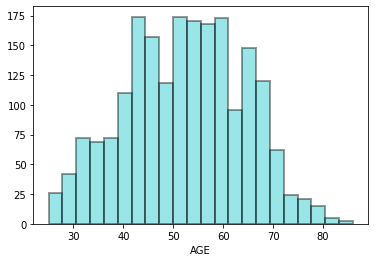

In [15]:
sns.distplot(df['AGE'],
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')

In [16]:
criminal_cases = df.groupby('PARTY')['Criminal'].sum().reset_index().sort_values('Criminal',ascending=False).head(30)
ax = px.bar(criminal_cases, x = 'PARTY',y = 'Criminal',color = 'PARTY', title='Total Criminal Cases by respective parties')
ax.show()

In [37]:
crime = df[df['WINNER']==1]
criminal_cases = crime.groupby('PARTY')['Criminal'].sum().reset_index().sort_values('Criminal',ascending=False).head(30)
ax = px.bar(criminal_cases, x = 'PARTY',y = 'Criminal',color = 'PARTY', title='Winning Parties with Number of Criminal Cases')
ax.show()

In [19]:
## changing the datatype
df['GENDER'] = df['GENDER'].astype('category') 
df['WINNER'] = df['WINNER'].astype('category') 

In [21]:
Female_winners = df[(df['WINNER']==1) & (df['GENDER']=='FEMALE')]
ax = px.histogram(Female_winners, 'STATE', title = 'Female Winners from different States')
ax.show()

In [22]:
male_winners = df[(df['WINNER']==1) & (df['GENDER']=='MALE')]
ax = px.histogram(male_winners, 'STATE', title='Male Winners from different States')
ax.show()

In [23]:
votes = df.groupby('STATE')['Total_votes'].sum().sort_values(ascending = False).reset_index()
ax = px.bar(votes,x = 'STATE',y = 'Total_votes',color='STATE', title='Total Votes cast State Wise')
ax.show()

In [32]:
#Filter for value not equal to 0 in column Winner, and then count of winner of each category.
new_df = df[df['WINNER'] != 0].CATEGORY.value_counts().reset_index() #Use .reset.index() to store it as a DF
new_df 


,index,CATEGORY
0,GENERAL,399
1,SC,85
2,ST,55


In [33]:
#Rename of Columns
new_df.rename(columns = {'index':'Category','CATEGORY':'Count'}, inplace = True)
new_df 

,Category,Count
0,GENERAL,399
1,SC,85
2,ST,55


In [34]:
#Set Category as index so Pie Chart can use it as a label.
new_df.set_index('Category', inplace= True)

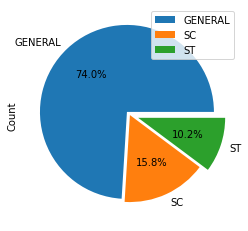

In [35]:
new_df.plot.pie(y='Count', explode = (0.05,0,0.1),autopct='%1.1f%%')